####Import Packages

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from datetime import datetime
from datetime import date

####Call Data

In [2]:
today = date.today()
data = web.DataReader('^GSPC', data_source = 'yahoo', start = '1/1/2008', end = today)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3060 entries, 2008-01-02 to 2020-02-27
Data columns (total 6 columns):
High         3060 non-null float64
Low          3060 non-null float64
Open         3060 non-null float64
Close        3060 non-null float64
Volume       3060 non-null int64
Adj Close    3060 non-null float64
dtypes: float64(5), int64(1)
memory usage: 167.3 KB


###Export Data to CSV

In [3]:
path = r'C:\Users\Nick\Desktop'
name = r'\ts_data'
date = datetime.now().strftime("%d-%m-%Y_%I-%M-%S_%p")
filetype = '.csv'
data.to_csv(path+name+date+filetype)

####Plot Time Series

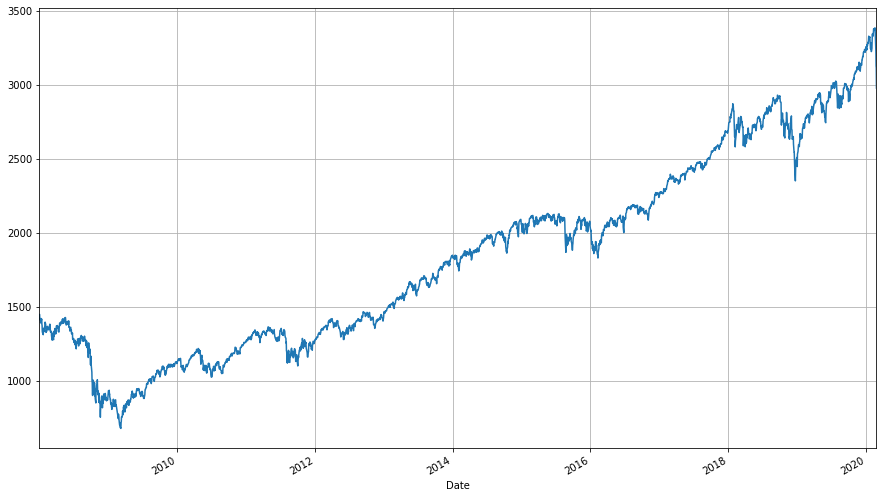

In [12]:
data['Close'].plot(grid=True, figsize=(15,9))

###Plot Rolling Averages

In [5]:
data['42d']=np.round(data['Close'].rolling(window=42).mean(),2)
data['252d']=np.round(data['Close'].rolling(window=252).mean(),2)
data[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2020-02-21,3337.750000,3293.06,3002.92
2020-02-24,3225.889893,3293.17,3004.64
2020-02-25,3128.209961,3290.89,3005.96
2020-02-26,3116.389893,3288.34,3007.24
2020-02-27,2978.760010,3282.12,3007.97


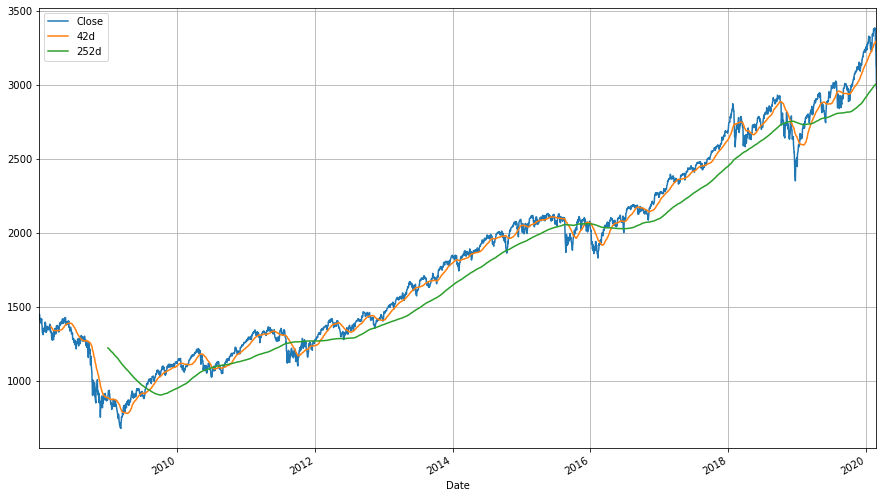

In [6]:
data[['Close', '42d', '252d']].plot(grid=True, figsize=(15,9))

#### Rule Based Triggers:

- ****Buy Signal (go long)**** 
    - The 42d trend is for the first time SD points aove the 252d trend
    
- ****Wait (park in cash)****
    - The 42d trend is within range of +/-SD points around the 252d trend
  
- ****Buy Signal (go short)****
    - the 42d trend is for the first time SD points below the 252d trend

####Setup Rules

In [7]:
data['42-252'] = data['42d'] - data['252d']
data['42-252'].tail()

Date
2020-02-21    290.14
2020-02-24    288.53
2020-02-25    284.93
2020-02-26    281.10
2020-02-27    274.15
Name: 42-252, dtype: float64

In [8]:
data['42-252'].head()

Date
2008-01-02   NaN
2008-01-03   NaN
2008-01-04   NaN
2008-01-07   NaN
2008-01-08   NaN
Name: 42-252, dtype: float64

In [9]:
SD = 50
data['Regime'] = np.where(data['42-252'] > SD, 1, 0)
data['Regime'] = np.where(data['42-252'] < -SD, -1, data['Regime'])
data['Regime'].value_counts()

 1    2014
 0     736
-1     310
Name: Regime, dtype: int64

####Regime Plot

(-1.1, 1.1)

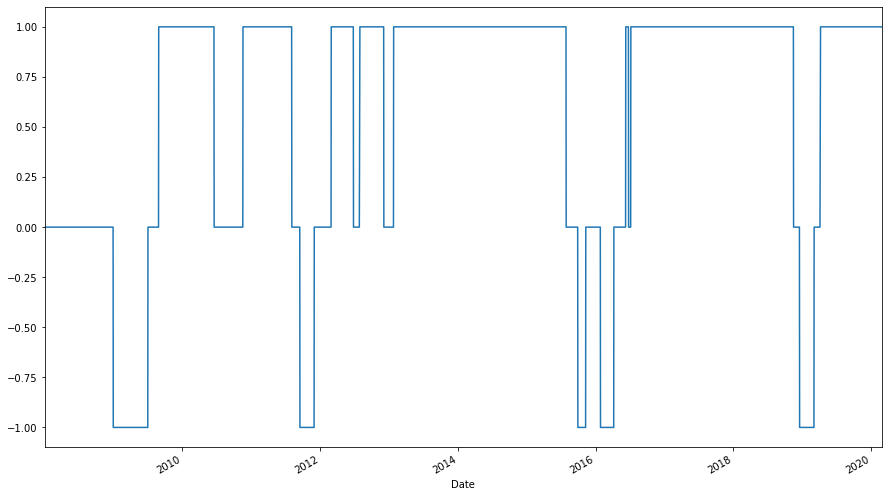

In [10]:
from matplotlib import pyplot as plt
data['Regime'].plot(lw = 1.5, figsize=(15,9))
plt.ylim([-1.1, 1.1])

####Backtest

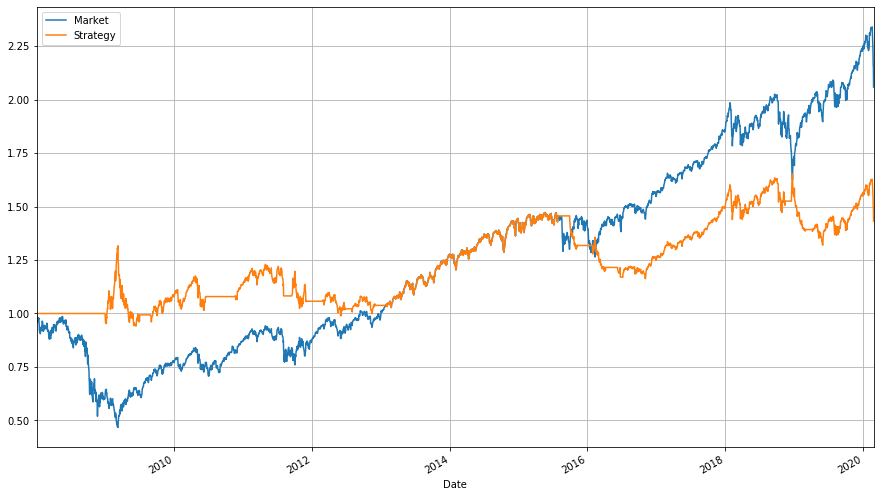

In [11]:
data['Market'] = np.log(data['Close'] / data['Close'].shift(1))
data['Strategy'] = data['Regime'].shift(1) * data['Market']
data[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid = True, figsize=(15,9))